# Lab | Handling Data Imbalance in Classification Models

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [5]:
numerical=pd.read_csv('numerical7_02.csv')

In [6]:
categorical=pd.read_csv('categorical7_02.csv')
target=pd.read_csv('target7_02.csv')

In [7]:
categorical.shape

(95412, 13)

In [4]:
# Solih and veterans columns still need to be treated for NaNs

#categorical['SOLIH'].value_counts(dropna=False)
#categorical['VETERANS'].value_counts(dropna=False)

In [5]:
df = pd.DataFrame(categorical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
6,SOLIH,89212
7,VETERANS,84986


In [6]:
# decided to drop SOLIH & VETERANS 
categorical = categorical.drop(['SOLIH', 'VETERANS'], axis=1)

In [7]:
#numerical = numerical.drop('Unnamed: 0', axis=1)
numerical.isna().sum()

Unnamed: 0    0
ODATEDW       0
TCODE         0
DOB           0
AGE           0
             ..
AVGGIFT       0
CONTROLN      0
HPHONE_D      0
RFA_2F        0
CLUSTER2      0
Length: 323, dtype: int64

In [8]:
# to check for any NaN values
nulls_percent_df = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,Unnamed: 0,0.0
1,ODATEDW,0.0
2,TCODE,0.0
3,DOB,0.0
4,AGE,0.0
...,...,...
318,AVGGIFT,0.0
319,CONTROLN,0.0
320,HPHONE_D,0.0
321,RFA_2F,0.0


In [9]:
# to check column which has any NaN values
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].head(10)

,column_name,nulls_percentage
316,NEXTDATE,0.104526


In [10]:
# dropping the column as it looks to be irrelevant
numerical = numerical.drop('NEXTDATE', axis=1)

In [11]:
categorical.shape

(95412, 11)

In [12]:
#so we still have 323 numerical columns and 11 categorical

#Chi-squared test is used to decide if feature has relationship with target

In [13]:
categorical.dtypes

Unnamed: 0     int64
STATE         object
CLUSTER        int64
HOMEOWNR      object
GENDER        object
DATASRCE       int64
RFA_2R        object
RFA_2A        object
GEOCODE2      object
DOMAIN_A      object
DOMAIN_B       int64
dtype: object

## Feature Selection using K Best

In [14]:
# Let's start with implementing another algorithm for feature selection, 
# which is the Select K Best. We have provided a code to you that you can use directly. 
# Your task is to complete the parts missing in the code.
# Let's work on the case where the target is categorical and the features are numerical. 
# You can use the chi square method and select top k features.

# As you might notice here, one of the disadvantages of using select_k_best is that we 
# have to provide the value of k ourself, through an estimated guess.
# We will see how the algorithm uses the chi square score to select the top k features. 
# There is a huge imbalance in the dataset as one category is very under-represented. 
# For now, check the application on the data (as it is), and later we will talk about 
# methods to remove the imbalance.

In [15]:
# we will use MinMaxScaler for this
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numerical)

In [16]:
pd.DataFrame(numerical_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
0,0.000000,0.426523,0.000000,0.382286,0.608247,0.666667,0.555556,0.000000,0.000000,0.393939,...,0.863139,0.010,0.045226,0.927939,0.003676,0.006465,0.498045,0.0,1.000000,0.622951
1,0.000010,0.784946,0.000014,0.535736,0.463918,0.833333,1.000000,0.066390,0.000000,0.151515,...,0.913321,0.025,0.045226,0.969489,0.016544,0.014399,0.774510,0.0,0.333333,0.000000
2,0.000021,0.498208,0.000014,0.000000,0.624862,0.333333,0.111111,0.008299,0.000000,0.202020,...,0.774179,0.005,0.045226,0.937311,0.011029,0.006204,0.078617,1.0,1.000000,0.967213
3,0.000031,0.283154,0.000000,0.288465,0.711340,0.000000,0.444444,0.008299,0.000000,0.232323,...,0.867245,0.010,0.045226,0.906175,0.008272,0.005534,0.899764,1.0,1.000000,0.655738
4,0.000042,0.211470,0.000000,0.206076,0.793814,0.333333,0.222222,0.248963,0.010101,0.282828,...,0.953923,0.015,0.492462,0.822972,0.012868,0.005586,0.037079,1.0,0.333333,0.409836


In [17]:
X = numerical_scaled
y = target['TARGET_B']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kbest = SelectKBest(chi2, k=10).fit_transform(X, y)
# Here we choose 10 so that is easier to analyze results later, as we will see
selected = pd.DataFrame(kbest)
selected.head()

,0,1,2,3,4,5,6,7,8,9
0,0.010101,0.020202,0.070707,0.131313,0.272727,0.000000,0.020202,0.341463,0.045226,1.000000
1,0.000000,0.979798,0.989899,0.989899,0.989899,0.949495,0.919192,0.024390,0.045226,0.333333
2,0.020202,0.000000,0.010101,0.060606,0.181818,0.000000,0.000000,0.341463,0.045226,1.000000
3,0.000000,0.101010,0.252525,0.505051,0.696970,0.101010,0.010101,0.170732,0.045226,1.000000
4,0.989899,0.000000,0.010101,0.020202,0.161616,0.000000,0.252525,0.195122,0.492462,0.333333


In [18]:
# To check the scores
model = SelectKBest(chi2, k=10).fit(X, y)
df = pd.DataFrame(data = model.scores_, columns = ['score'])
df['Column'] = numerical.columns
print(df.sort_values(by = ['score'], ascending = False).head(10))

          score    Column
320  210.290810    RFA_2F
314   43.654118  LASTDATE
308   27.516508  CARDGIFT
113   26.474583      HVP1
114   25.757492      HVP2
115   21.545080      HVP3
118   19.261394      HVP6
116   14.874056      HVP4
25    13.034181      ETH2
132   12.581538       RP1


In [19]:
cols = df.sort_values(by = ['score'], ascending = False).head(10)['Column']
cols

320      RFA_2F
314    LASTDATE
308    CARDGIFT
113        HVP1
114        HVP2
115        HVP3
118        HVP6
116        HVP4
25         ETH2
132         RP1
Name: Column, dtype: object

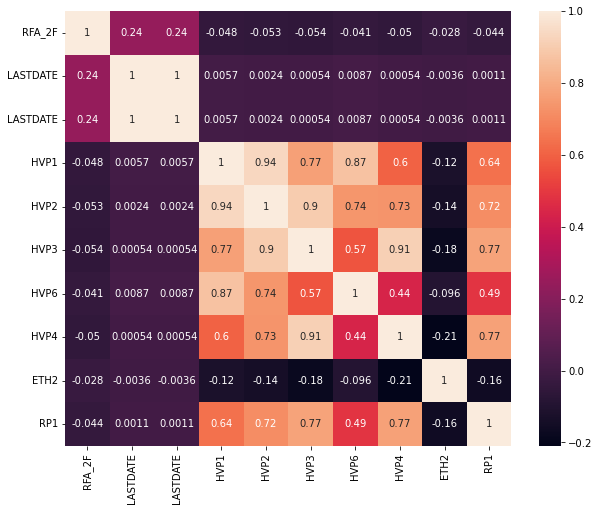

In [20]:
corr_matrix=numerical[['RFA_2F', 'LASTDATE', 'LASTDATE', 'HVP1', 'HVP2', 'HVP3', 'HVP6', 'HVP4', 'ETH2', 'RP1']].corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [21]:
selected.columns = cols
selected.head()

Column,RFA_2F,LASTDATE,CARDGIFT,HVP1,HVP2,HVP3,HVP6,HVP4,ETH2,RP1
0,0.010101,0.020202,0.070707,0.131313,0.272727,0.000000,0.020202,0.341463,0.045226,1.000000
1,0.000000,0.979798,0.989899,0.989899,0.989899,0.949495,0.919192,0.024390,0.045226,0.333333
2,0.020202,0.000000,0.010101,0.060606,0.181818,0.000000,0.000000,0.341463,0.045226,1.000000
3,0.000000,0.101010,0.252525,0.505051,0.696970,0.101010,0.010101,0.170732,0.045226,1.000000
4,0.989899,0.000000,0.010101,0.020202,0.161616,0.000000,0.252525,0.195122,0.492462,0.333333


In [22]:
# Few features we see are highly correlated but using Kmethod anyhow we have selected the best 10 features, therefore, 
# I am not going to do any reduction/scaling down of features and move ahead. 

## Recursive Feature Elimination

In [23]:
# Would not deal with it at the moment
# Will visit it later if i have time or else will do my analysis based on Kmethod

#### Concatenating the files

In [24]:
donors = pd.concat([selected, categorical, target], axis=1)
donors

,RFA_2F,LASTDATE,CARDGIFT,HVP1,HVP2,HVP3,HVP6,HVP4,ETH2,RP1,...,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,Unnamed: 0,TARGET_B,TARGET_D
0,0.010101,0.020202,0.070707,0.131313,0.272727,0.000000,0.020202,0.341463,0.045226,1.000000,...,female,3,L,E,C,T,2,0,0,0.0
1,0.000000,0.979798,0.989899,0.989899,0.989899,0.949495,0.919192,0.024390,0.045226,0.333333,...,male,3,L,G,A,S,1,1,0,0.0
2,0.020202,0.000000,0.010101,0.060606,0.181818,0.000000,0.000000,0.341463,0.045226,1.000000,...,male,3,L,E,C,R,2,2,0,0.0
3,0.000000,0.101010,0.252525,0.505051,0.696970,0.101010,0.010101,0.170732,0.045226,1.000000,...,female,3,L,E,C,R,2,3,0,0.0
4,0.989899,0.000000,0.010101,0.020202,0.161616,0.000000,0.252525,0.195122,0.492462,0.333333,...,female,3,L,F,A,S,2,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0.101010,0.020202,0.101010,0.494949,0.737374,0.000000,0.696970,0.000000,0.497487,0.000000,...,male,3,L,G,C,C,2,95407,0,0.0
95408,0.030303,0.181818,0.717172,0.888889,0.919192,0.050505,0.161616,0.000000,0.502513,0.000000,...,male,3,L,F,A,C,1,95408,0,0.0
95409,0.141414,0.000000,0.000000,0.000000,0.010101,0.000000,0.030303,0.097561,0.537688,0.666667,...,male,3,L,E,B,C,3,95409,0,0.0
95410,0.010101,0.898990,0.969697,1.000000,1.000000,0.090909,0.888889,0.439024,0.994975,1.000000,...,female,2,L,F,A,C,1,95410,1,18.0


In [25]:
# dropping TARGET_D as we can only have one target, i.e, TARGET_B
donors = donors.drop(['Unnamed: 0', 'TARGET_D'], axis=1)

In [26]:
# to check for any null values in dataframe
donors.isnull().values.any()

False

# Logistic Regression Model: 

In [27]:
X = donors.drop('TARGET_B', axis=1)
y = donors['TARGET_B']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [29]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num= X_test.select_dtypes(include = np.number)

X_train_cat=X_train.select_dtypes(include = object)
X_test_cat=X_test.select_dtypes(include = object)

### First scaling X_train_num and encoding X_train_cat

In [30]:
from sklearn.preprocessing import MinMaxScaler
X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)
X_train_norm.shape

(76329, 13)

### One Hot encoding

In [31]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(drop='first').fit(X_train_cat) 
encoded = encoder.transform(X_train_cat).toarray()
encoded_columns = OneHotEncoder(drop='first').fit(X_train_cat).get_feature_names_out(input_features=X_train_cat.columns) 
#this allows us to get the columns names for our encoded array

X_train_cat_encoded = pd.DataFrame(encoded, columns = encoded_columns)
X_train_cat_encoded

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
76325,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
76326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
76327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [32]:
X_train_processed = np.concatenate([X_train_norm, X_train_cat_encoded], axis=1,)


X_train_processed = pd.DataFrame(X_train_processed)
X_train_processed   #this is all the training data encoded and scaled!! 

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.020202,0.000000,0.000000,0.000000,0.040404,0.000000,0.010101,0.055556,0.040201,0.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.010101,0.000000,0.050505,0.393939,0.767677,0.000000,0.212121,0.083333,0.502513,1.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.030303,0.141414,0.282828,0.606061,0.777778,0.040404,0.373737,0.138889,0.502513,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.000000,0.000000,0.030303,0.171717,0.000000,0.000000,0.694444,0.025126,0.666667,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.020202,0.060606,0.000000,0.000000,0.027778,0.045226,0.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76324,0.030303,0.030303,0.131313,0.787879,0.979798,0.000000,0.878788,0.055556,0.497487,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
76325,0.000000,0.020202,0.080808,0.242424,0.505051,0.010101,0.050505,0.000000,0.040201,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
76326,0.010101,0.010101,0.040404,0.242424,0.767677,0.000000,0.343434,0.027778,0.045226,0.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
76327,0.030303,0.010101,0.040404,0.121212,0.222222,0.000000,0.010101,0.305556,0.497487,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Next, do same thing with test data

In [33]:
#using same transformer as in the train set
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)
X_test_norm

,RFA_2F,LASTDATE,CARDGIFT,HVP1,HVP2,HVP3,HVP6,HVP4,ETH2,RP1,CLUSTER,DATASRCE,DOMAIN_B
0,0.494949,0.050505,0.464646,0.898990,0.979798,0.00000,0.737374,0.055556,0.015075,0.000000,0.134615,1.0,0.666667
1,0.000000,0.000000,0.000000,0.040404,0.303030,0.00000,0.444444,0.138889,0.045226,1.000000,0.326923,1.0,0.333333
2,0.151515,0.040404,0.454545,0.878788,0.949495,0.00000,0.424242,0.083333,0.497487,1.000000,0.173077,1.0,1.000000
3,0.000000,0.000000,0.000000,0.020202,0.080808,0.00000,0.000000,0.388889,0.492462,0.333333,0.846154,1.0,0.333333
4,0.000000,0.010101,0.040404,0.121212,0.323232,0.00000,0.040404,0.027778,0.040201,0.333333,0.692308,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.000000,0.000000,0.000000,0.070707,0.373737,0.00000,0.161616,0.027778,0.492462,0.000000,0.538462,1.0,0.333333
19079,0.030303,0.848485,0.949495,1.000000,1.000000,0.40404,0.252525,0.027778,0.030151,0.000000,0.653846,1.0,0.000000
19080,0.343434,0.000000,0.010101,0.060606,0.191919,0.00000,0.000000,0.250000,0.045226,0.000000,0.673077,1.0,0.333333
19081,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.027778,0.040201,0.000000,0.038462,0.5,0.000000


In [34]:
#using same encoder as above
encoded = encoder.transform(X_test_cat).toarray()
encoded_columns = OneHotEncoder(drop='first').fit(X_test_cat).get_feature_names_out(input_features=X_test_cat.columns) 
#this allows us to get the columns names for our encoded array

X_test_cat_encoded = pd.DataFrame(encoded, columns = encoded_columns)
X_test_cat_encoded

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19080,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
19081,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
X_test_processed = np.concatenate([X_test_norm, X_test_cat_encoded], axis=1)

X_test_processed = pd.DataFrame(X_test_processed)
X_test_processed   #here we have a dataframe with all the test data encoded and scaled!

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.494949,0.050505,0.464646,0.898990,0.979798,0.00000,0.737374,0.055556,0.015075,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.000000,0.000000,0.040404,0.303030,0.00000,0.444444,0.138889,0.045226,1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.151515,0.040404,0.454545,0.878788,0.949495,0.00000,0.424242,0.083333,0.497487,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.000000,0.000000,0.020202,0.080808,0.00000,0.000000,0.388889,0.492462,0.333333,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.000000,0.010101,0.040404,0.121212,0.323232,0.00000,0.040404,0.027778,0.040201,0.333333,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.000000,0.000000,0.000000,0.070707,0.373737,0.00000,0.161616,0.027778,0.492462,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19079,0.030303,0.848485,0.949495,1.000000,1.000000,0.40404,0.252525,0.027778,0.030151,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19080,0.343434,0.000000,0.010101,0.060606,0.191919,0.00000,0.000000,0.250000,0.045226,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
19081,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.027778,0.040201,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
y_train = y_train.reset_index(drop=True) 
# needed because the transformation also reset the index for X_train_scaled
# so we need this for y_test as well...
y_test = y_test.reset_index(drop=True) 
#Drop=true is used to reset index, so that the original index isn't added as a column

In [37]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_processed, y_train)
#solver is whatever math you use to find 
#logistic regression uses a mathematical method to find the optimal value of the parameters
#of the best line

C:\Users\gau82\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train_processed, y_train)

In [39]:
# Now we can make predictions on the test set:
predictions = classification.predict(X_test_processed)
predictions
classification.score(X_test_processed, y_test)

0.9468112980139392

In [69]:
pd.Series(predictions).value_counts()
# This shows that the disparity in the numbers are amplified by the model

0    11615
1     7468
dtype: int64

In [40]:
print(y_test.value_counts())

0    18068
1     1015
Name: TARGET_B, dtype: int64


### bonus: KNN classifier: look at nearest neighbours and use the majority to determine class

In [72]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train_processed, y_train)
predictions_clf = clf.predict(X_test_processed)
clf.score(X_test_processed, y_test)

0.945658439448724

In [73]:
confusion_matrix(y_test, predictions_clf)

array([[18044,    24],
       [ 1013,     2]], dtype=int64)

In [74]:
pd.Series(y_test).value_counts()

0    18068
1     1015
Name: TARGET_B, dtype: int64

In [75]:
pd.Series(predictions_clf).value_counts()

0    19057
1       26
dtype: int64

### Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)
#predicted 18,068 Nos that were really Nos
#predicted 0 Yes but there were actually 1015 Yes
#we want to accurately predict the minority class, the Yes (1) column 

#There were actually 18068 No, and 1015 yes
#First 0 means 0 times we correctly predicted Yes, (we never guessed a Yes when it was really No)
## of False Positives

#Second 0 means 0 times we predicted Yes and it was really a Yes (we never guessed a Yes)
# # of True positives 

array([[18068,     0],
       [ 1015,     0]], dtype=int64)

In [42]:
# predicted | 0 | 1 | 
# --------------------------
# actual  0 | + |  | 
# --------------------------
#         1 |   | +

In [43]:
X_test_processed

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.494949,0.050505,0.464646,0.898990,0.979798,0.00000,0.737374,0.055556,0.015075,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.000000,0.000000,0.040404,0.303030,0.00000,0.444444,0.138889,0.045226,1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.151515,0.040404,0.454545,0.878788,0.949495,0.00000,0.424242,0.083333,0.497487,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.000000,0.000000,0.020202,0.080808,0.00000,0.000000,0.388889,0.492462,0.333333,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.000000,0.010101,0.040404,0.121212,0.323232,0.00000,0.040404,0.027778,0.040201,0.333333,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.000000,0.000000,0.000000,0.070707,0.373737,0.00000,0.161616,0.027778,0.492462,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19079,0.030303,0.848485,0.949495,1.000000,1.000000,0.40404,0.252525,0.027778,0.030151,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19080,0.343434,0.000000,0.010101,0.060606,0.191919,0.00000,0.000000,0.250000,0.045226,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
19081,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.027778,0.040201,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
print(y_test)
y_test.value_counts()

0        0
1        0
2        0
3        0
4        0
        ..
19078    0
19079    0
19080    0
19081    0
19082    0
Name: TARGET_B, Length: 19083, dtype: int64


0    18068
1     1015
Name: TARGET_B, dtype: int64

## Quick recap of precision, recall, and f1 score:

#### PRECISION

Precision tells us of the cases where we predicted a 1 (Yes), how often were we correct?

##### RECALL

Recall tells us out of all the Yes (1) cases, how many did we predict? Recall is very important in this lab, where we ultimately want to maximize this, the instances of the minority class being correctly predicted

##### F1


F1 is a general number of getting it right, harmonic mean of precision and recall

F1 is high if both precision and recall are relatively high. Use F1 if you can't decide which is more important, precision or recall

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_processed, y_train)
pred = LR.predict(X_test_processed)

print("precision: ",precision_score(y_test,pred))
#tells us of the cases where we predicted a 1, how often were we correct? 

print("recall: ",recall_score(y_test,pred))
#out of all the diabetes cases, how many did we identify?

print("f1: ",f1_score(y_test,pred))
#general number of getting it right, harmonic mean of precision and recall 

precision:  0.0
recall:  0.0
f1:  0.0


C:\Users\gau82\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Managing imbalance in the dataset

Managing imbalance in the dataset

1) Check for the imbalance.

2) Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.

3) Each time fit the model and see how the accuracy of the model has changed.

## Imbalance

NOTE: for downsampling/upsampling/SMOTE we need both the features and the target in one dataframe: need to keep tem together.
But we only do it on the training set, not on the test set. So we need to recombine features and targets for the train set, then treat imbalance.

In [45]:
y_train1 = pd.DataFrame(y_train)

In [46]:
trained_data1 = pd.DataFrame(X_train_processed)

In [47]:
# y_train = trained_data= y_train['TARGET_B']
#trained_data = trained_data.drop(['Target_B'], axis=1)
# trained_data = pd.DataFrame(X_train_processed, y_train)
#trained_data

trained_data = pd.concat([trained_data1, y_train1], axis=1, join='inner')
display(trained_data)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,TARGET_B
0,0.020202,0.000000,0.000000,0.000000,0.040404,0.000000,0.010101,0.055556,0.040201,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.010101,0.000000,0.050505,0.393939,0.767677,0.000000,0.212121,0.083333,0.502513,1.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.030303,0.141414,0.282828,0.606061,0.777778,0.040404,0.373737,0.138889,0.502513,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.000000,0.000000,0.000000,0.030303,0.171717,0.000000,0.000000,0.694444,0.025126,0.666667,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
4,0.000000,0.000000,0.000000,0.020202,0.060606,0.000000,0.000000,0.027778,0.045226,0.000000,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76324,0.030303,0.030303,0.131313,0.787879,0.979798,0.000000,0.878788,0.055556,0.497487,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
76325,0.000000,0.020202,0.080808,0.242424,0.505051,0.010101,0.050505,0.000000,0.040201,0.000000,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
76326,0.010101,0.010101,0.040404,0.242424,0.767677,0.000000,0.343434,0.027778,0.045226,0.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
76327,0.030303,0.010101,0.040404,0.121212,0.222222,0.000000,0.010101,0.305556,0.497487,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [48]:
trained_data['TARGET_B'].value_counts()

#Yes there's a data imbalance in the training data for the target feature. 

0    72501
1     3828
Name: TARGET_B, dtype: int64

In [49]:
from sklearn.utils import resample

category_0 = trained_data[trained_data['TARGET_B'] == 0]
category_1 = trained_data[trained_data['TARGET_B'] == 1]

## Downsampling

In [50]:
category_0_undersampled = resample(category_0, 
                                   replace=False, 
                                   n_samples = len(category_1))

# leave category_1 (majority) as it is, but creating new dataframe, ~3828 samples from category_1 and put it into category_0
# in downsampling, we are making the dataframe fit the number of rows as in the minority class, so eliminating majority class rows

In [51]:
print(category_0_undersampled.shape)
print(category_1.shape)

(3828, 38)
(3828, 38)


In [52]:
data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)

In [53]:
data_downsampled['TARGET_B'].value_counts()

0    3828
1    3828
Name: TARGET_B, dtype: int64

In [54]:
X_train_downsampled = data_downsampled.drop(['TARGET_B'], axis=1)
y_train_downsampled = data_downsampled['TARGET_B']


print(X_train_downsampled.shape)
y_train_downsampled.shape

(7656, 37)


(7656,)

## DOWNSAMPLED training dataset: Running the logistic regression model

In [55]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_downsampled, y_train_downsampled)

In [56]:
predictions = classification.predict(X_test_processed)
predictions
classification.score(X_test_processed, y_test)

0.6112246502122308

In [57]:
confusion_matrix(y_test, predictions)

array([[11120,  6948],
       [  471,   544]], dtype=int64)

In [58]:
# predicted | 0 | 1 | 
# --------------------------
# actual  0 | + |  | 
# --------------------------
#         1 |   | +

## Upsampling

In [59]:
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))

#in upsampling, we do the opposite of downsampling, we are making the minority class fit the number of rows as the majority class 
#replace= True makes sure you can pick the same row several times to upsample 

In [60]:
data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)

In [61]:
data_upsampled['TARGET_B'].value_counts()

0    72501
1    72501
Name: TARGET_B, dtype: int64

In [62]:
X_train_upsampled = data_upsampled.drop(['TARGET_B'], axis=1)
y_train_upsampled = data_upsampled['TARGET_B']


print(X_train_upsampled.shape)
y_train_upsampled.shape

(145002, 37)


(145002,)

###  UPSAMPLED training dataset: Running the logistic regression model

In [63]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_upsampled, y_train_upsampled)

In [64]:
predictions = classification.predict(X_test_processed)
predictions
classification.score(X_test_processed, y_test)

0.6126919247497773

In [65]:
confusion_matrix(y_test, predictions)

array([[11146,  6922],
       [  469,   546]], dtype=int64)

In [66]:
# predicted | 0 | 1 | 
# --------------------------
# actual  0 | + |  | 
# --------------------------
#         1 |   | +

In [ ]:
#Conclusion-- DUE to down & up sampling there is only a slight improvement in the results. 
# We correctly predicted more YES, but at the expense of incorrectly predicting a lot YES when it was really a NO